## PROJET PYTHON : N'DA Williams M1SCI

### Analyse de données démographiques menée sur un échantillon de population adulte aléatoire

-Netoyage
-Exploration
-Visualisation
-Clustering
.

### Description des éléments du dataset
### Paramètres -
#### âge : l'âge d'un individu
#### workclass : un terme général pour représenter le statut d'emploi d'un individu
#### fnlwgt : poids final. Il s'agit du nombre de personnes que le recensement estime que l'entrée représente.
#### éducation : le niveau d'éducation le plus élevé atteint par un individu.
#### educationnum : le plus haut niveau d'éducation atteint sous forme numérique.
#### maritalstatus : état civil d'une personne.
#### occupation : le type général d'occupation d'un individu.
#### relationship: représente ce que cet individu est par rapport aux autres.
#### race : Description de la race d'un individu
#### sexe : le sexe de l'individu
#### capitalgain : gains en capital d'un individu
#### capitalloss:: perte de capital pour un individu
#### hoursperweek : heures de travail hebdomadaires déclarées par un individu
#### nativecountry: pays d'origine d'un individu

In [53]:
#import des bibliothèques
import pandas as pd
import missingno as mno
import matplotlib.pyplot as plt
import numpy as np

In [54]:
#chargement du dataset
df=pd.read_csv("adult.data.csv")
#Afficher les 50 premieres entrées du dataset
df.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [55]:
#Afficher les noms des colonnes
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [56]:
#Nombre de ligne et de colonnes du dataset
df.shape

(32561, 15)

In [57]:
#les types dans le dataset
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

#### Après visualisation du dataset, on constate que les valeurs manquantes sont représentées par un point d'interrogation, ce qui n'est pas la norme usuelle. On va donc remplacer ces valeurs par nan

In [58]:
#Remplacer '?' par nan
df.replace('?', np.nan, inplace=True)

### Prétraitement

In [59]:
#verification des valeurs nulles
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [60]:
#verification des doublons
df.duplicated().sum()

24

In [61]:
#copie du jeu de données
new_df=df.copy()

In [62]:
#suppression des doublons
df=df.drop_duplicates()

In [63]:
#vérification de la taille du dataset
df.shape

(32537, 15)

#### Gestion des variables manquantes
##### On utilise missingno et sa matrice pour visualiser les variables manquantes dans les différentes colonnes

<Axes: >

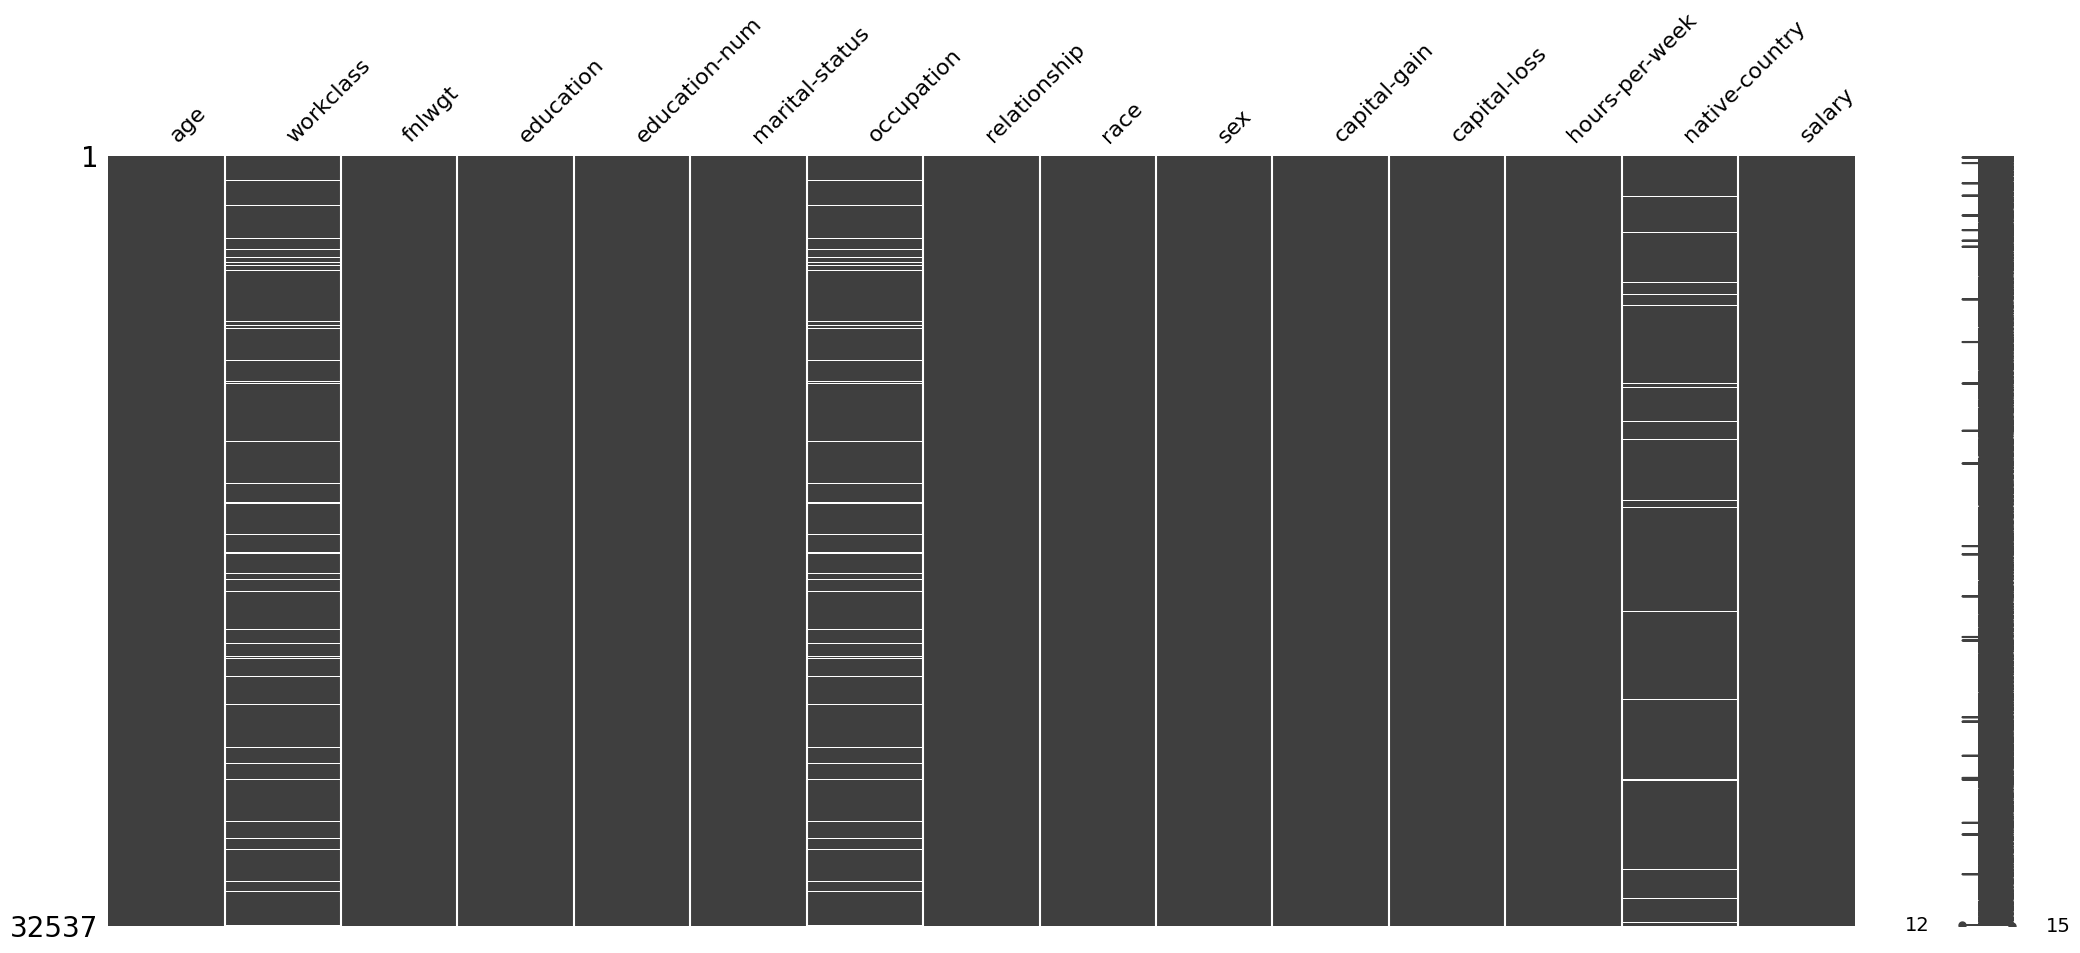

In [64]:
#Utilisation de la matrice de misingno
mno.matrix(df)

In [65]:
#Selection des variables dont nous avons besoin
df=df[['age',"education","race","sex","hours-per-week","native-country","salary"]]
df

,age,education,race,sex,hours-per-week,native-country,salary
0,39,Bachelors,White,Male,40,United-States,<=50K
1,50,Bachelors,White,Male,13,United-States,<=50K
2,38,HS-grad,White,Male,40,United-States,<=50K
3,53,11th,Black,Male,40,United-States,<=50K
4,28,Bachelors,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,White,Female,38,United-States,<=50K
32557,40,HS-grad,White,Male,40,United-States,>50K
32558,58,HS-grad,White,Female,40,United-States,<=50K
32559,22,HS-grad,White,Male,20,United-States,<=50K


In [66]:
#Remplacement des valeurs nulles de la colonne native-country par une autre classe
df['native-country']=df['native-country'].fillna('Inconnu')

In [67]:
#verifier qu'il n'y a plus de valeur nulle dans le jeu de données
df.isna().sum()

age               0
education         0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Exploration

In [68]:
#Un peu de statistiques
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32537.0,NaN,NaN,NaN,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,32537.0,NaN,NaN,NaN,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0
native-country,32537,42,United-States,29153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,32537,2,<=50K,24698,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#Afficher les différents ages représentés
df["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

### Le nombre de personnes par race

In [70]:
df["race"].value_counts()

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

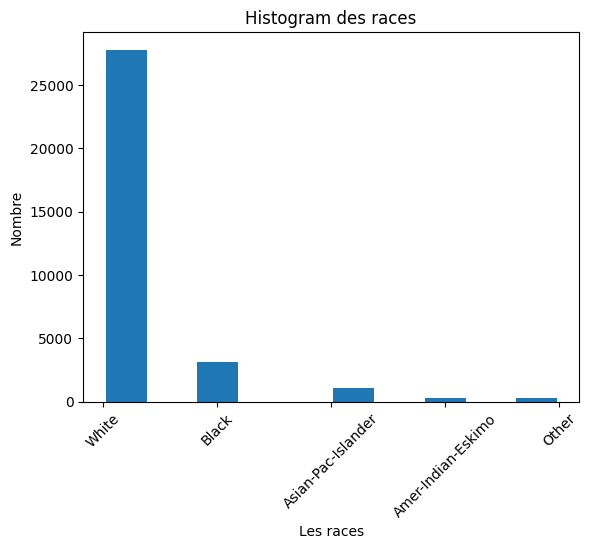

In [71]:
#Histogramme des Races
races = df['race']
races
plt.hist(races, bins=10, histtype='bar',rwidth=0.9)
plt.xlabel('Les races')
plt.ylabel('Nombre')
plt.title('Histogram des races')
plt.xticks(rotation=45)

plt.show()

### L'age moyen en fonction des races

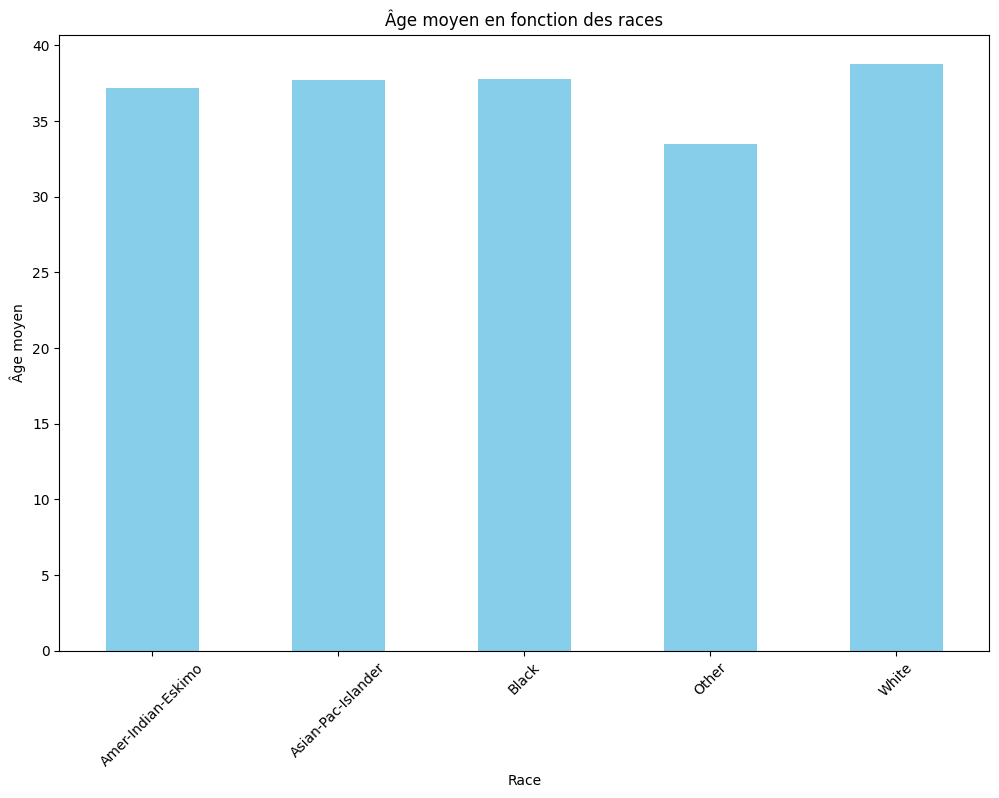

In [72]:
# Calculer la moyenne des âges pour chaque race
mean_ages_by_race = df.groupby('race')['age'].mean()

# Créer un diagramme à barres
plt.figure(figsize=(12, 8))
mean_ages_by_race.plot(kind='bar', color='skyblue')

# Ajouter des étiquettes et un titre
plt.xlabel('Race')
plt.ylabel('Âge moyen')
plt.title('Âge moyen en fonction des races')

# Afficher le graphique
plt.xticks(rotation=45)  # Tourner les labels pour améliorer la lisibilité
plt.show()

### L'ensemble des nationalités représentées et leur nombre

In [73]:
#le nobre de nationalité
print(len(df["native-country"].unique()))
#le nombre par de nationnalité
df["native-country"].value_counts()

42


native-country
United-States                 29153
Mexico                          639
Inconnu                         582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [74]:
#liste exhaustive des nationalités représentées
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Inconnu', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

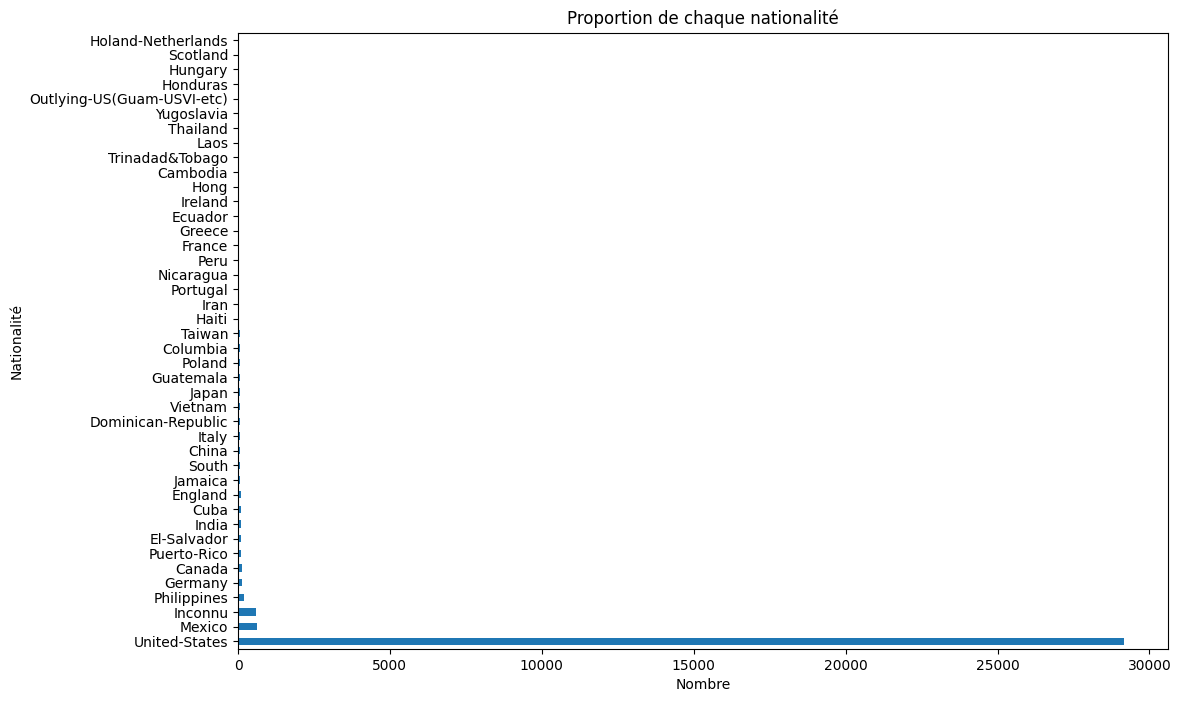

In [75]:
# Créer un diagramme à barres horizontales montrant la proportion des nationalités
plt.figure(figsize=(12, 8))
nationality_counts=df["native-country"].value_counts()
nationality_counts.plot(kind='barh')
plt.xlabel('Nombre')
plt.ylabel('Nationalité')
plt.title('Proportion de chaque nationalité')
plt.show()

### L'age moyen des hommes

In [76]:
avg = df.loc[df['sex'] == 'Male', 'age'].mean()
avg

39.43605051664753

### Le pourcentage de personne ayant le BACHELOR

In [77]:
pourcentage_bac = round(len(df.loc[df['education'] == 'Bachelors']) / len(df)*100)
pourcentage_bac

16

### Camembert représentant le niveau d'education des américains

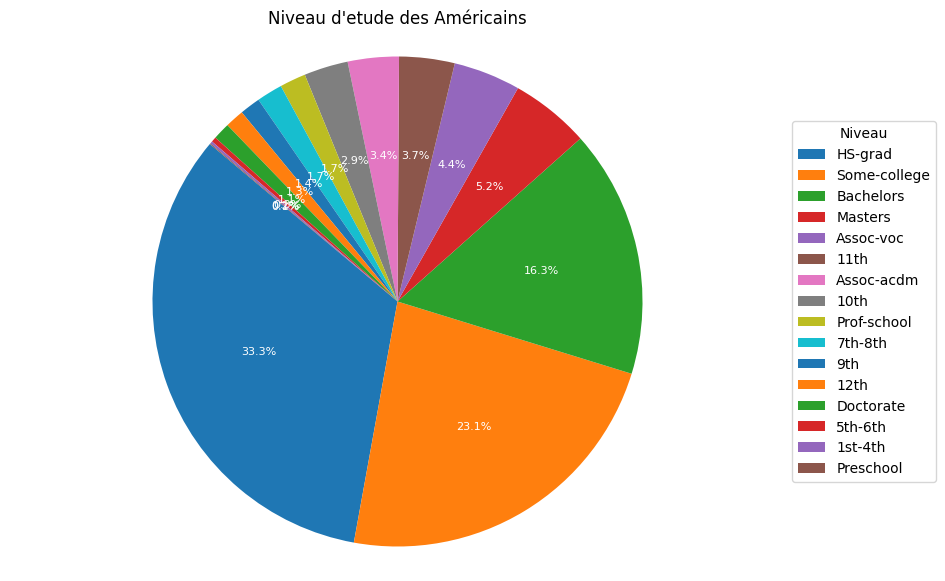

In [78]:
americains = df[df['native-country'] == 'United-States']

niveau_us = americains['education'].value_counts()

# Créer un graphique en camembert
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(niveau_us, labels=niveau_us.index, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))
# Ajuster la taille de la police des labels
for text in texts:
    text.set_fontsize(8)

# Ajuster la taille de la police des pourcentages
for autotext in autotexts:
    autotext.set_fontsize(8)
plt.legend(wedges, niveau_us.index, title="Niveau", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
#plt.pie(niveau_us, labels=niveau_us.index, autopct='%1.1f%%', startangle=140)
plt.title("Niveau d'etude des Américains")
plt.axis('equal')  # Assure que le graphique est dessiné en cercle

plt.show()

### Le pourcentage de personne avec un niveau élevé d'éducation (Bachelor,Master,Doctorat)

In [79]:

educ_avance = df.loc[df['education'].isin(['Bachelors', 'Masters','Doctorate'])]
educ_avance

,age,education,race,sex,hours-per-week,native-country,salary
0,39,Bachelors,White,Male,40,United-States,<=50K
1,50,Bachelors,White,Male,13,United-States,<=50K
4,28,Bachelors,Black,Female,40,Cuba,<=50K
5,37,Masters,White,Female,40,United-States,<=50K
8,31,Masters,White,Female,50,United-States,>50K
...,...,...,...,...,...,...,...
32538,38,Bachelors,Black,Female,45,United-States,>50K
32539,71,Doctorate,White,Male,10,United-States,>50K
32544,31,Masters,Other,Female,30,United-States,<=50K
32553,32,Masters,Asian-Pac-Islander,Male,11,Taiwan,<=50K


In [80]:
#Pourcentage de ceux qui ont un niveau élevé d'education et qui touchent plus de 50k
advanced_education_percent = educ_avance['salary'].value_counts(normalize = True)['>50K'] * 100
advanced_education_percent

46.55448717948718

### Le pourcentage de personne n'ayant pas un niveau élevé d'education qui touchent plus de 50k

In [81]:
lower_education = df.loc[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

In [82]:
lower_education_percent = lower_education['salary'].value_counts(normalize = True)['>50K'] * 100
lower_education_percent

17.37793923909138

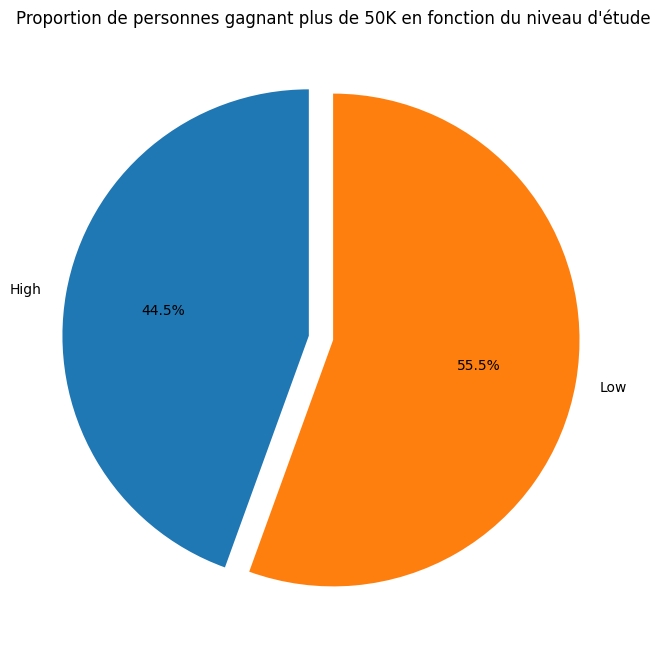

In [83]:
#Représentration en camembert
# Créer une nouvelle colonne 'high_salary' indiquant si le salaire est supérieur à 50K
df['high_salary'] = df['salary'].apply(lambda x: 1 if x == '>50K' else 0)

# Définir ce qu'est un niveau d'étude élevé
high_education_levels = ['Bachelors', 'Masters', 'Doctorate']

# Créer une nouvelle colonne 'high_education' indiquant si le niveau d'étude est élevé ou non
df['high_education'] = df['education'].apply(lambda x: 'High' if x in high_education_levels else 'Low')

# Compter le nombre de personnes avec un salaire >50K pour chaque niveau d'étude
salary_education_counts = df[df['high_salary'] == 1].groupby('high_education').size()

# Créer un diagramme en camembert éclaté
plt.figure(figsize=(8, 8))
plt.pie(salary_education_counts, labels=salary_education_counts.index, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))

# Ajouter un titre
plt.title('Proportion de personnes gagnant plus de 50K en fonction du niveau d\'étude')

# Afficher le graphique
plt.show()

### le nombre minimum d'heure de travail par semaine

In [84]:
heure_min = df['hours-per-week'].min()
heure_min

1

In [85]:
#maximum des heures de travail
heure_max=df["hours-per-week"].max()
heure_max

99

### Moyenne des heures de travail par race

In [86]:
average_hours_by_race = df.groupby('race')['hours-per-week'].mean().sort_values()
average_hours_by_race

race
Black                 38.425048
Other                 39.468635
Amer-Indian-Eskimo    40.048232
Asian-Pac-Islander    40.131985
White                 40.692067
Name: hours-per-week, dtype: float64

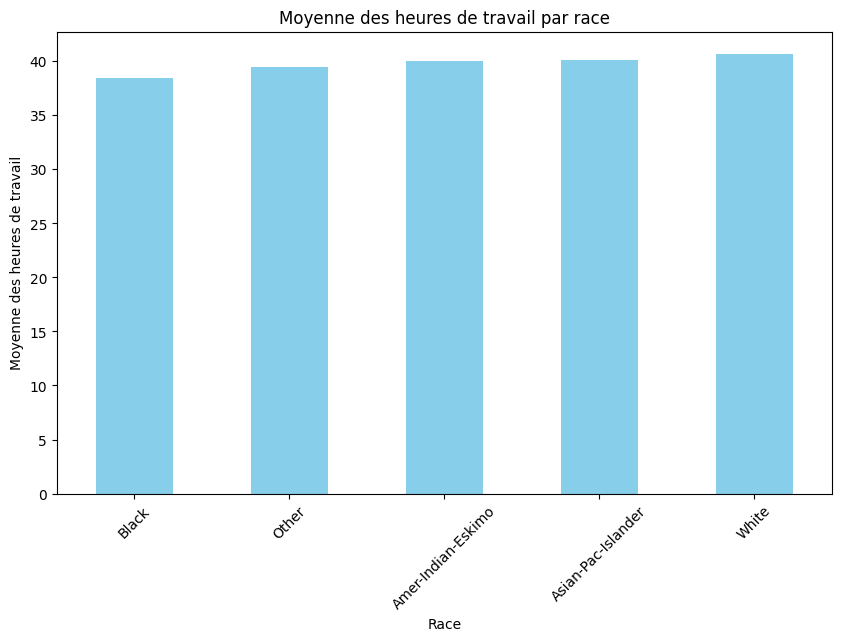

In [87]:
#Représentation
plt.figure(figsize=(10, 6))
average_hours_by_race.plot(kind='bar', color='skyblue')
plt.xlabel('Race')
plt.ylabel('Moyenne des heures de travail')
plt.title('Moyenne des heures de travail par race')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

plt.show()

### le pays dont le pourcentage de personnes gagnant plus de 50 000 euros est le plus élevé et quel est ce pourcentage 

In [88]:
#Cherchons le pourcentage par pays des personnes obtenant plus de 50K 
salaire_pays = df.loc[df['salary'] == '>50K', 'native-country'].value_counts()
total_pays = df['native-country'].value_counts()
salaire_sup_pays = round((salaire_pays/total_pays) *100,1)
salaire_sup_pays

native-country
Cambodia                      36.8
Canada                        32.2
China                         26.7
Columbia                       3.4
Cuba                          26.3
Dominican-Republic             2.9
Ecuador                       14.3
El-Salvador                    8.5
England                       33.3
France                        41.4
Germany                       32.1
Greece                        27.6
Guatemala                      4.8
Haiti                          9.1
Holand-Netherlands             NaN
Honduras                       7.7
Hong                          30.0
Hungary                       23.1
Inconnu                       25.1
India                         40.0
Iran                          41.9
Ireland                       20.8
Italy                         34.2
Jamaica                       12.3
Japan                         38.7
Laos                          11.1
Mexico                         5.2
Nicaragua                      5.9
Outly

In [89]:
pays_sup = salaire_sup_pays.idxmax()
pays_sup

'Iran'

In [90]:
pourcentage_pays_sup = salaire_sup_pays[pays_sup]
pourcentage_pays_sup 

41.9

### Proportion des noirs qui touchent plus de 50 K

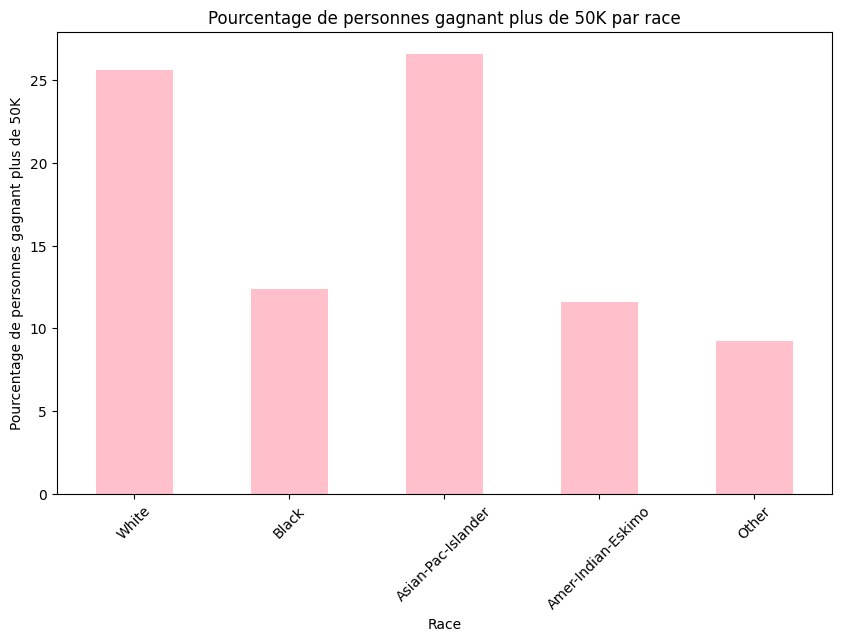

In [91]:
# Calculer le nombre de personnes gagnant plus de 50K par race
highest_earning_by_race = df.loc[df['salary'] == '>50K', 'race'].value_counts()

# Calculer le nombre total de personnes par race
total_count_by_race = df['race'].value_counts()

# Calculer le pourcentage de personnes gagnant plus de 50K par race
percentage_earning_over_50k_by_race = round((highest_earning_by_race / total_count_by_race) * 100, 1)

# Créer un graphique à barres pour représenter le pourcentage de personnes gagnant plus de 50K par race
plt.figure(figsize=(10, 6))
percentage_earning_over_50k_by_race.plot(kind='bar', color='pink')
plt.xlabel('Race')
plt.ylabel('Pourcentage de personnes gagnant plus de 50K')
plt.title('Pourcentage de personnes gagnant plus de 50K par race')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

# Afficher le graphique
plt.show()

### Clustering

In [42]:
#import des bibliothèques nécessaires
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [92]:
#Sélection des valeurs
d_util=df.iloc[:,[0,4,6]].values
d_util

array([[39, 40, '<=50K'],
       [50, 13, '<=50K'],
       [38, 40, '<=50K'],
       ...,
       [58, 40, '<=50K'],
       [22, 20, '<=50K'],
       [52, 40, '>50K']], dtype=object)

In [93]:
# Sélection des colonnes pertinentes
data = df[['age', 'hours-per-week', 'salary']]

In [94]:
# Encodage de la variable qualitative salary avec LabelEncoder
label_encoder = LabelEncoder()
data['salary_encoded'] = label_encoder.fit_transform(data['salary'])

C:\Users\viann\AppData\Local\Temp\ipykernel_1896\1725862366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary_encoded'] = label_encoder.fit_transform(data['salary'])


In [95]:
# Standardisation des données numériques
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['age', 'hours-per-week', 'salary_encoded']])

#### Clustering KMeans
#### Dans le clustering KMeans on doit choisir un nombre K de cluster, pour trouver ce nombre k de cluster on utilise la méthode du coude

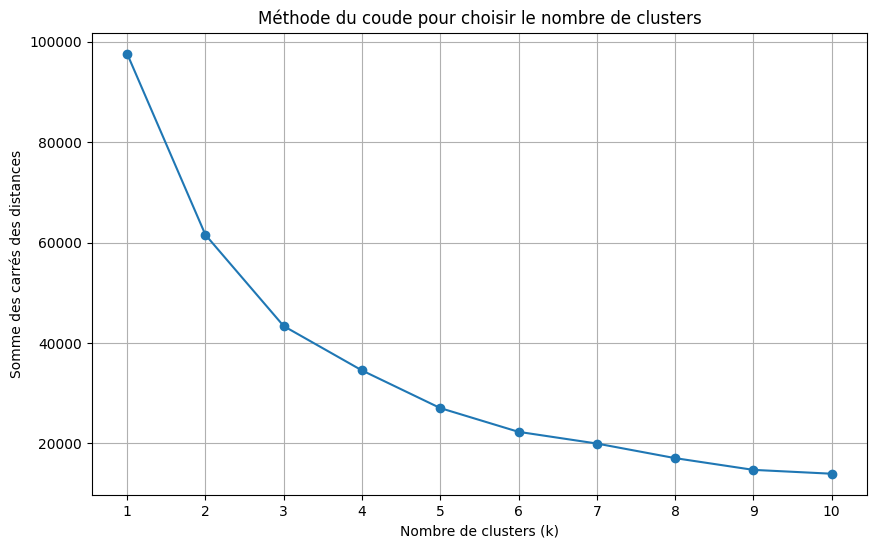

In [96]:
# Calculer la somme des carrés des distances pour différentes valeurs de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Tracer le coude (Elbow method)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Somme des carrés des distances')
plt.title('Méthode du coude pour choisir le nombre de clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

C:\Users\viann\AppData\Local\Temp\ipykernel_1896\1713863125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


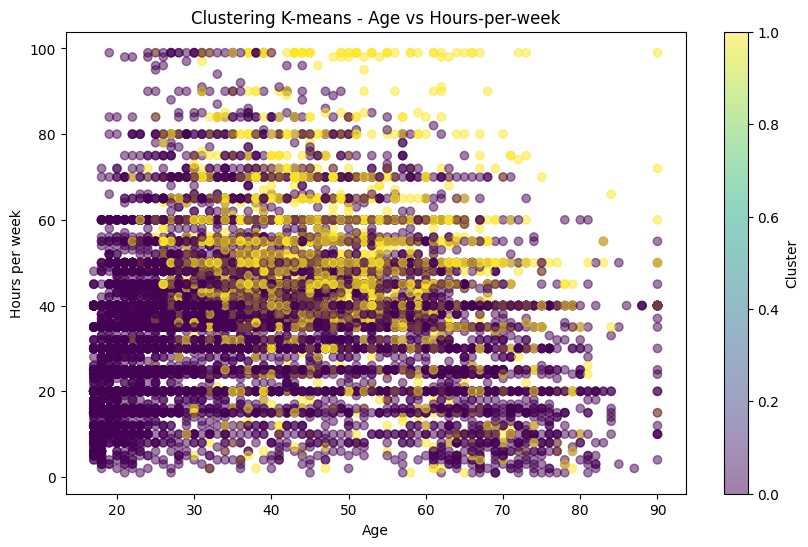

In [97]:
# Appliquer K-means avec un nombre de clusters choisi
k = 2  # Exemple: choisir le nombre de clusters après l'analyse du coude
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
data['cluster'] = clusters
# Scatter plot des clusters en fonction de 'age' et 'hours-per-week'
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['hours-per-week'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clustering K-means - Age vs Hours-per-week')
plt.xlabel('Age')
plt.ylabel('Hours per week')
plt.colorbar(label='Cluster')
plt.show()

#### Après visualisation, on se rend compte qu'on ne trouve pas de regroupement dans les données, on va donc essayer une autre forme de visualisation en 3D

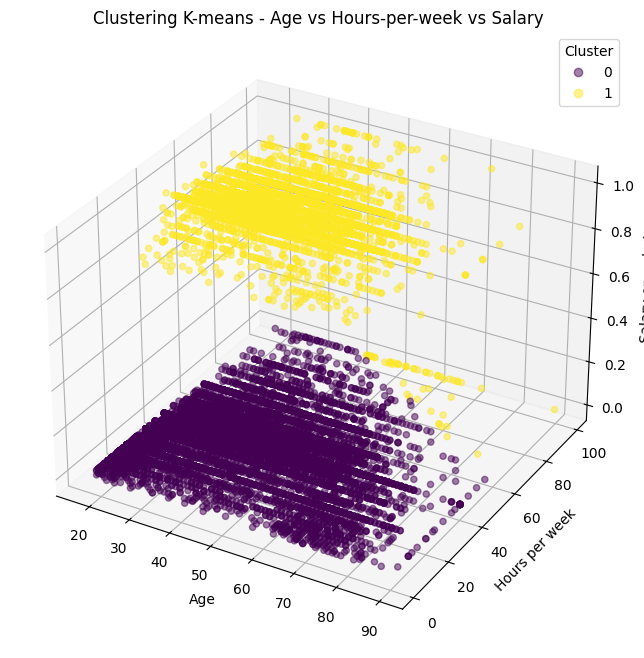

In [98]:
# Scatter plot 3D des clusters en fonction de 'age', 'hours-per-week' et 'salary_encoded'
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['age'], data['hours-per-week'], data['salary_encoded'], c=data['cluster'], cmap='viridis', alpha=0.5)

ax.set_title('Clustering K-means - Age vs Hours-per-week vs Salary')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per week')
ax.set_zlabel('Salary encoded')
ax.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

In [50]:
# Calcul du coefficient de silhouette
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Le coefficient de silhouette moyen est : {silhouette_avg}")

Le coefficient de silhouette moyen est : 0.4658229999795633


### Le clustering permet d'identifier des groupes de données, on peut l'utiliser pour faire la segmentation de projet, et proposer des produits en fonction de caractéristiques des personnes. Le silhouette score nous permet de dire si les données sont mieux représentées dans leurs clusters.